# Akbank Makine Öğrenmesi Bootcamp: Formula 1 Veri Analizi ve Tahmin Modeli
# Gözetimli Öğrenme kullanarak Formula 1 Yarış Sonuçları Tahminleri

Proje Açıklaması:

Bu proje, Formula 1 yarış sonuçlarını tahmin etmek için gözetimli öğrenme tekniklerini kullanmaktadır.
Veri seti: Formula 1 World Championship (1950-2024) - 13 farklı CSV dosyası
Hedef: Pilotların yarış performanslarını, puan kazanımlarını ve DNF durumlarını tahmin etmek.

Proje Kapsamı:
1. Keşifsel Veri Analizi (EDA)
2. Veri Ön İşleme ve Özellik Mühendisliği  
3. Çoklu Gözetimli Öğrenme Modelleri
4. Model Değerlendirme ve Karşılaştırma
5. Hiperparametre Optimizasyonu


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

Görselleştirme ayarları:

In [41]:
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("🏎️ FORMULA 1 YARIŞ SONUÇLARI TAHMİN MODELİ")
print("=" * 60)
print("Akbank Makine Öğrenmesi Bootcamp - Gözetimli Öğrenme Projesi")
print("=" * 60)

🏎️ FORMULA 1 YARIŞ SONUÇLARI TAHMİN MODELİ
Akbank Makine Öğrenmesi Bootcamp - Gözetimli Öğrenme Projesi


# 1. VERİ SETİ YÜKLEME VE İLK İNCELEME

In [42]:
print("\n📁 VERİ SETLERİ YÜKLEME")
print("-" * 40)

# Tüm CSV dosyalarını yükle
try:
    circuits = pd.read_csv('circuits.csv')
    races = pd.read_csv('races.csv')
    pit_stops = pd.read_csv('pit_stops.csv')
    seasons = pd.read_csv('seasons.csv')
    constructor_results = pd.read_csv('constructor_results.csv')
    sprint_results = pd.read_csv('sprint_results.csv')
    constructors = pd.read_csv('constructors.csv')
    lap_times = pd.read_csv('lap_times.csv')
    qualifying = pd.read_csv('qualifying.csv')
    status = pd.read_csv('status.csv')
    drivers = pd.read_csv('drivers.csv')
    results = pd.read_csv('results.csv')
    constructor_standings = pd.read_csv('constructor_standings.csv')
    
    print("✅ Tüm CSV dosyaları başarıyla yüklendi!")
    
    # Veri seti boyutu kontrolü (proje kriteri: >10MB veya >10k kayıt)
    total_rows = sum([df.shape[0] for df in [circuits, races, pit_stops, seasons, 
                     constructor_results, sprint_results, constructors, lap_times, 
                     qualifying, status, drivers, results, constructor_standings]])
    
    print(f"📊 Toplam kayıt sayısı: {total_rows:,} (>10,000 ✅)")
    
except FileNotFoundError as e:
    print(f"❌ Dosya yükleme hatası: {e}")
    print("Lütfen tüm CSV dosyalarının mevcut dizinde olduğundan emin olun")

# Veri setleri hakkında genel bilgi
datasets = {
    'circuits': circuits, 'races': races, 'pit_stops': pit_stops,
    'seasons': seasons, 'constructor_results': constructor_results,
    'sprint_results': sprint_results, 'constructors': constructors,
    'lap_times': lap_times, 'qualifying': qualifying, 'status': status,
    'drivers': drivers, 'results': results, 'constructor_standings': constructor_standings
}

print("\n📋 DATASET GENEL BAKIŞ")
print("-" * 40)
for name, df in datasets.items():
    print(f"{name:<20}: {df.shape[0]:>6,} satır, {df.shape[1]:>2} sütun")


📁 VERİ SETLERİ YÜKLEME
----------------------------------------
✅ Tüm CSV dosyaları başarıyla yüklendi!
📊 Toplam kayıt sayısı: 666,570 (>10,000 ✅)

📋 DATASET GENEL BAKIŞ
----------------------------------------
circuits            :     77 satır,  9 sütun
races               :  1,125 satır, 18 sütun
pit_stops           : 11,371 satır,  7 sütun
seasons             :     75 satır,  2 sütun
constructor_results : 12,625 satır,  5 sütun
sprint_results      :    360 satır, 16 sütun
constructors        :    212 satır,  5 sütun
lap_times           : 589,081 satır,  6 sütun
qualifying          : 10,494 satır,  9 sütun
status              :    139 satır,  2 sütun
drivers             :    861 satır,  9 sütun
results             : 26,759 satır, 18 sütun
constructor_standings: 13,391 satır,  7 sütun


# 2. KEŞİFSEL VERİ ANALİZİ (EDA)



🔍 KEŞİFSEL VERİ ANALİZİ (EDA)

📈 ANA VERİ SETİ ANALİZİ - RESULTS
----------------------------------------
Toplam yarış sonucu: 26,759
Benzersiz pilot sayısı: 861
Benzersiz yarış sayısı: 1125
Benzersiz konstruktör sayısı: 211


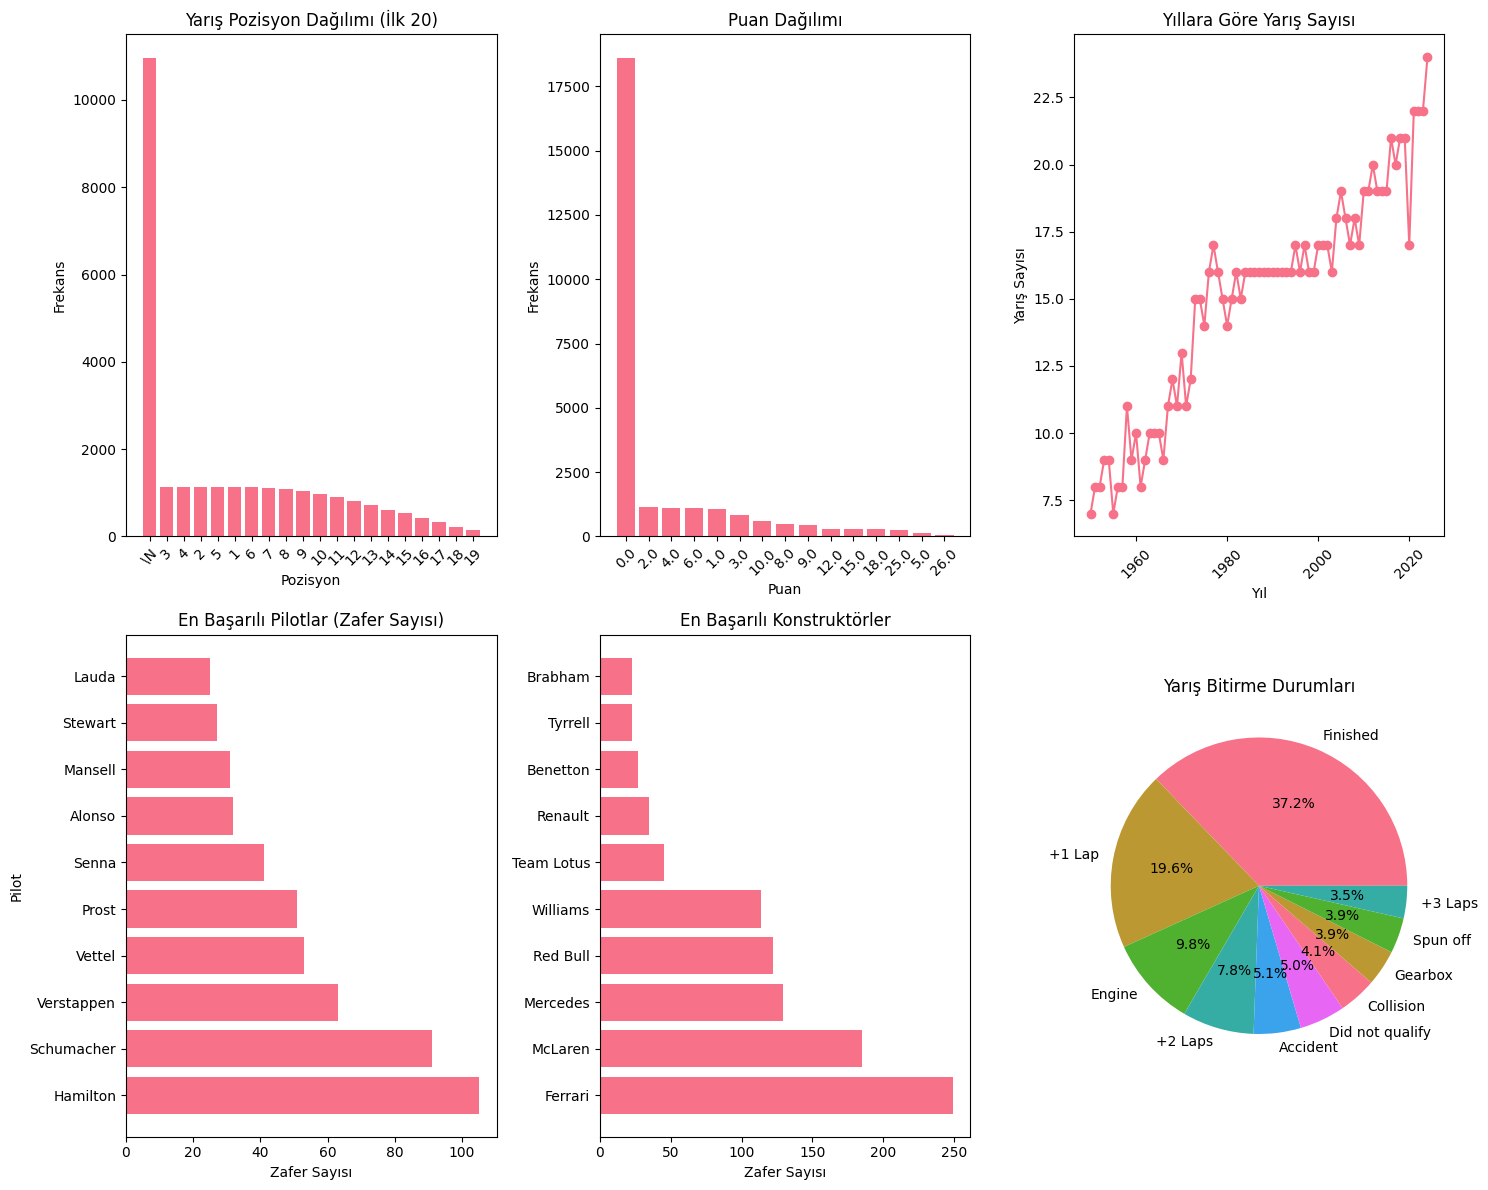


📊 KORELASYON ANALİZİ
----------------------------------------


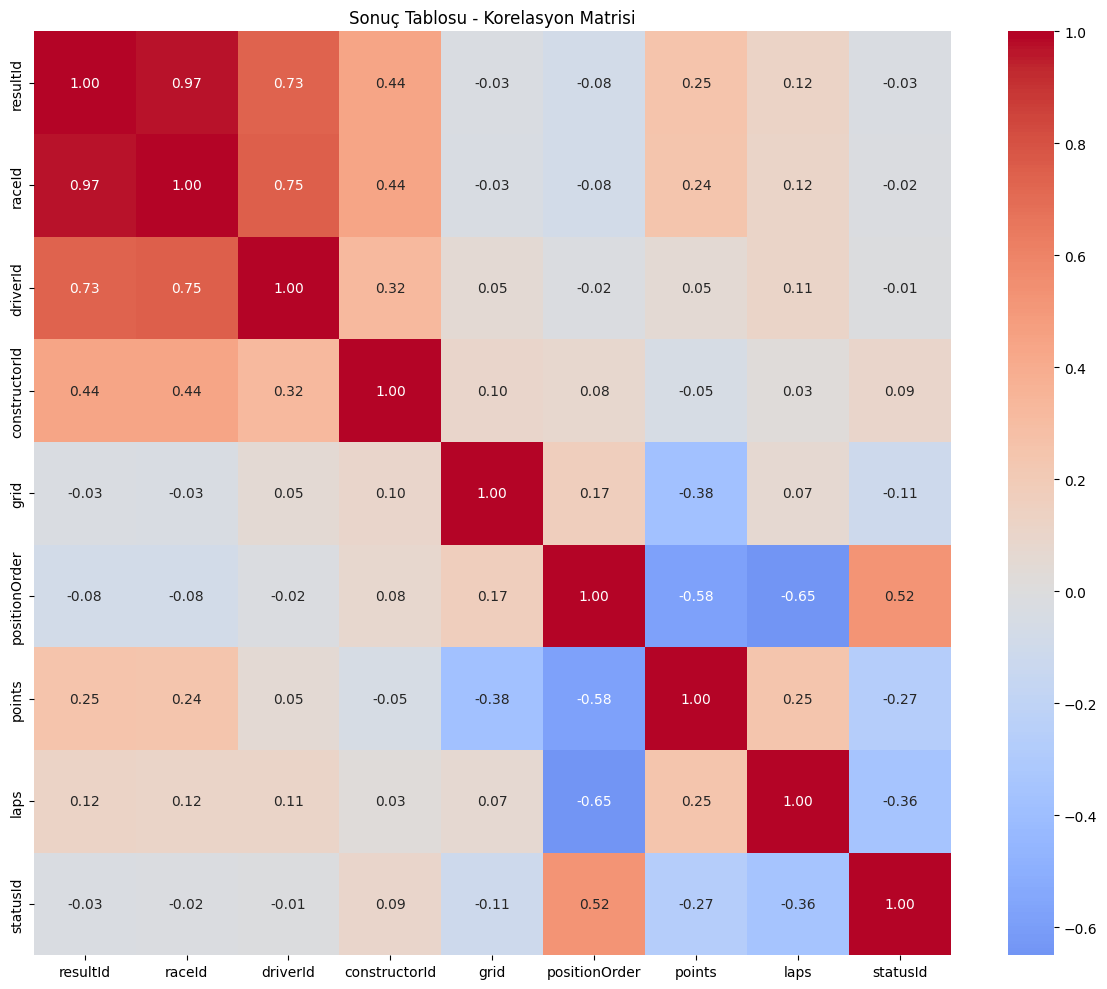

In [43]:
print("\n\n🔍 KEŞİFSEL VERİ ANALİZİ (EDA)")
print("=" * 60)

# Ana veri seti: results tablosu analizi
print(f"\n📈 ANA VERİ SETİ ANALİZİ - RESULTS")
print("-" * 40)
print(f"Toplam yarış sonucu: {len(results):,}")
print(f"Benzersiz pilot sayısı: {results['driverId'].nunique()}")
print(f"Benzersiz yarış sayısı: {results['raceId'].nunique()}")
print(f"Benzersiz konstruktör sayısı: {results['constructorId'].nunique()}")

# Yarış sonuçları dağılımı
plt.figure(figsize=(15, 12))

# 1. Pozisyon dağılımı
plt.subplot(2, 3, 1)
position_counts = results['position'].value_counts().head(20)
plt.bar(range(len(position_counts)), position_counts.values)
plt.title('Yarış Pozisyon Dağılımı (İlk 20)')
plt.xlabel('Pozisyon')
plt.ylabel('Frekans')
plt.xticks(range(len(position_counts)), position_counts.index, rotation=45)

# 2. Puan dağılımı
plt.subplot(2, 3, 2)
points_dist = results['points'].value_counts().head(15)
plt.bar(range(len(points_dist)), points_dist.values)
plt.title('Puan Dağılımı')
plt.xlabel('Puan')
plt.ylabel('Frekans')
plt.xticks(range(len(points_dist)), points_dist.index, rotation=45)

# 3. Yıllara göre yarış sayısı
plt.subplot(2, 3, 3)
races_by_year = races.groupby('year').size()
plt.plot(races_by_year.index, races_by_year.values, marker='o')
plt.title('Yıllara Göre Yarış Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Yarış Sayısı')
plt.xticks(rotation=45)

# 4. En başarılı pilotlar (kazanım sayısı)
plt.subplot(2, 3, 4)
wins_by_driver = results[results['position'] == '1'].groupby('driverId').size().sort_values(ascending=False).head(10)
driver_names = []
for driver_id in wins_by_driver.index:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].iloc[0]
    driver_names.append(driver_name)

plt.barh(range(len(wins_by_driver)), wins_by_driver.values)
plt.title('En Başarılı Pilotlar (Zafer Sayısı)')
plt.ylabel('Pilot')
plt.xlabel('Zafer Sayısı')
plt.yticks(range(len(wins_by_driver)), driver_names)

# 5. En başarılı konstruktörler
plt.subplot(2, 3, 5)
wins_by_constructor = results[results['position'] == '1'].groupby('constructorId').size().sort_values(ascending=False).head(10)
constructor_names = []
for const_id in wins_by_constructor.index:
    const_name = constructors[constructors['constructorId'] == const_id]['name'].iloc[0]
    constructor_names.append(const_name[:15])  # İsmi kısalt

plt.barh(range(len(wins_by_constructor)), wins_by_constructor.values)
plt.title('En Başarılı Konstruktörler')
plt.xlabel('Zafer Sayısı')
plt.yticks(range(len(wins_by_constructor)), constructor_names)

# 6. DNF analizi
plt.subplot(2, 3, 6)
status_counts = results.merge(status, on='statusId')['status'].value_counts().head(10)
plt.pie(status_counts.values, labels=[s[:15] for s in status_counts.index], autopct='%1.1f%%')
plt.title('Yarış Bitirme Durumları')

plt.tight_layout()
plt.show()

# Korelasyon analizi için sayısal sütunları seç
print("\n📊 KORELASYON ANALİZİ")
print("-" * 40)

# Sayısal sütunları belirle
numeric_cols = results.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = results[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Sonuç Tablosu - Korelasyon Matrisi')
plt.tight_layout()
plt.show()

# 3. VERİ ÖN İŞLEME VE ÖZELLİK MÜHENDİSLİĞİ

In [44]:
print("\n\n🔧 VERİ ÖN İŞLEME VE ÖZELLİK MÜHENDİSLİĞİ")
print("=" * 60)

def create_comprehensive_dataset():
    """Formula 1 verileri için kapsamlı veri seti oluştur"""
    
    print("🔗 Tabloları birleştiriliyor...")
    
    # Ana veri seti: results
    main_data = results.copy()
    
    # Yarış bilgilerini ekle
    main_data = main_data.merge(
        races[['raceId', 'year', 'round', 'circuitId', 'name', 'date']], 
        on='raceId', how='left'
    )
    
    # Pist bilgilerini ekle
    main_data = main_data.merge(
        circuits[['circuitId', 'name', 'country', 'lat', 'lng']], 
        on='circuitId', how='left', suffixes=('_race', '_circuit')
    )
    
    # Pilot bilgilerini ekle
    main_data = main_data.merge(
        drivers[['driverId', 'forename', 'surname', 'nationality', 'dob']], 
        on='driverId', how='left'
    )
    
    # Konstruktör bilgilerini ekle
    main_data = main_data.merge(
        constructors[['constructorId', 'name', 'nationality']], 
        on='constructorId', how='left', suffixes=('_driver', '_constructor')
    )
    
    # Qualifying pozisyonlarını ekle
    qualifying_pos = qualifying.groupby(['raceId', 'driverId']).agg({
        'position': 'first'
    }).reset_index().rename(columns={'position': 'qualifying_position'})
    
    main_data = main_data.merge(qualifying_pos, on=['raceId', 'driverId'], how='left')
    
    # Durum bilgilerini ekle
    main_data = main_data.merge(status[['statusId', 'status']], on='statusId', how='left')
    
    print("✅ Tablolar başarıyla birleştirildi!")
    return main_data

# Kapsamlı veri seti oluştur
f1_dataset = create_comprehensive_dataset()
print(f"📊 Birleştirilmiş veri seti boyutu: {f1_dataset.shape}")

def engineer_features(data):
    """Özellik mühendisliği uygula"""
    
    print("\n🛠️ Özellik mühendisliği uygulanıyor...")
    
    # Pozisyonu sayısala çevir
    data['position_numeric'] = pd.to_numeric(data['position'], errors='coerce')
    data['qualifying_position'] = pd.to_numeric(data['qualifying_position'], errors='coerce')
    
    # Yaş hesaplama
    data['dob'] = pd.to_datetime(data['dob'], errors='coerce')
    data['race_date'] = pd.to_datetime(data['date'], errors='coerce')
    data['driver_age'] = (data['race_date'] - data['dob']).dt.days / 365.25
    
    # Kategorik özellikler
    data['is_podium'] = (data['position_numeric'] <= 3).astype(int)
    data['is_points'] = (data['position_numeric'] <= 10).astype(int)
    data['is_dnf'] = data['status'].str.contains('Finished', na=False).apply(lambda x: 0 if x else 1)
    
    # Pilot deneyimi özellikleri
    data = data.sort_values(['driverId', 'year', 'round'])
    
    driver_stats = []
    for driver_id in data['driverId'].unique():
        driver_data = data[data['driverId'] == driver_id].copy()
        
        # Kümülatif istatistikler
        driver_data['career_races'] = range(1, len(driver_data) + 1)
        driver_data['career_wins'] = (driver_data['position_numeric'] == 1.0).cumsum()
        driver_data['career_podiums'] = (driver_data['position_numeric'] <= 3).cumsum()
        driver_data['career_points'] = driver_data['points'].fillna(0).cumsum()
        
        # Hareketli ortalamalar (son 5 yarış)
        driver_data['avg_position_last5'] = driver_data['position_numeric'].rolling(5, min_periods=1).mean()
        driver_data['avg_points_last5'] = driver_data['points'].fillna(0).rolling(5, min_periods=1).mean()
        
        driver_stats.append(driver_data)
    
    enhanced_data = pd.concat(driver_stats, ignore_index=True)
    
    print("✅ Özellik mühendisliği tamamlandı!")
    print(f"📊 Yeni özellik sayısı: {enhanced_data.shape[1]}")
    
    return enhanced_data

# Özellik mühendisliği uygula
f1_enhanced = engineer_features(f1_dataset)

# Eksik değer analizi
print("\n📋 EKSİK DEĞER ANALİZİ")
print("-" * 40)
missing_data = f1_enhanced.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

if len(missing_data) > 0:
    print("Eksik değerli sütunlar:")
    for col, count in missing_data.head(10).items():
        percentage = (count / len(f1_enhanced)) * 100
        print(f"{col:<25}: {count:>6,} ({percentage:>5.1f}%)")
else:
    print("✅ Eksik değer bulunamadı!")



🔧 VERİ ÖN İŞLEME VE ÖZELLİK MÜHENDİSLİĞİ
🔗 Tabloları birleştiriliyor...
✅ Tablolar başarıyla birleştirildi!
📊 Birleştirilmiş veri seti boyutu: (26759, 35)

🛠️ Özellik mühendisliği uygulanıyor...
✅ Özellik mühendisliği tamamlandı!
📊 Yeni özellik sayısı: 47

📋 EKSİK DEĞER ANALİZİ
----------------------------------------
Eksik değerli sütunlar:
qualifying_position      : 16,265 ( 60.8%)
position_numeric         : 10,953 ( 40.9%)
avg_position_last5       :  2,307 (  8.6%)


# 4. ALGORİTMA SEÇİMİ VE MODEL GELİŞTİRME

In [49]:
print("\n\n🤖 ALGORİTMA SEÇİMİ VE MODEL GELİŞTİRME")
print("=" * 60)

# Görev 1: Puan Tahmini (Regresyon)
def prepare_points_prediction():
    """Puan tahmini için veri hazırlığı"""
    
    print("\n🎯 GÖREV 1: PUAN TAHMİNİ (REGRESYON)")
    print("-" * 50)
    
    data = f1_enhanced.copy()
    
    # Temiz veri seçimi
    data = data.dropna(subset=['points', 'qualifying_position', 'driver_age'])
    data['points'] = pd.to_numeric(data['points'], errors='coerce')
    data = data.dropna(subset=['points'])
    
    # Özellik seçimi
    feature_cols = [
        'qualifying_position', 'driver_age', 'career_races', 'career_wins',
        'career_podiums', 'avg_position_last5', 'avg_points_last5', 
        'year', 'round'
    ]
    
    # Eksik değerleri doldur
    for col in feature_cols:
        if col in data.columns:
            data[col] = data[col].fillna(data[col].median())
    
    X = data[feature_cols]
    y = data['points']
    
    print(f"✅ Regresyon veri seti hazır: {X.shape[0]} örnek, {X.shape[1]} özellik")
    return X, y

# Görev 2: Pozisyon Sınıflandırması
def prepare_position_classification():
    """Pozisyon sınıflandırması için veri hazırlığı"""
    
    print("\n🎯 GÖREV 2: POZİSYON SINIFLANDIRMASI")
    print("-" * 50)
    
    data = f1_enhanced.copy()
    
    # Sadece tamamlanan yarışlar
    data = data.dropna(subset=['position_numeric', 'qualifying_position', 'driver_age'])
    data = data[data['position_numeric'] > 0]
    
    # Sınıf etiketleri oluştur
    def categorize_position(pos):
        if pos <= 3:
            return 'Podyum'
        elif pos <= 10:
            return 'Puan'
        else:
            return 'Puan Yok'
    
    data['position_category'] = data['position_numeric'].apply(categorize_position)
    
    # Özellik seçimi
    feature_cols = [
        'qualifying_position', 'driver_age', 'career_races', 'career_wins',
        'career_podiums', 'avg_position_last5', 'avg_points_last5',
        'year', 'round'
    ]
    
    # Eksik değerleri doldur
    for col in feature_cols:
        if col in data.columns:
            data[col] = data[col].fillna(data[col].median())
    
    X = data[feature_cols]
    y = data['position_category']
    
    print(f"✅ Sınıflandırma veri seti hazır: {X.shape[0]} örnek, {X.shape[1]} özellik")
    print(f"📊 Sınıf dağılımı:\n{y.value_counts()}")
    
    return X, y

# Veri setlerini hazırla
X_points, y_points = prepare_points_prediction()
X_position, y_position = prepare_position_classification()



🤖 ALGORİTMA SEÇİMİ VE MODEL GELİŞTİRME

🎯 GÖREV 1: PUAN TAHMİNİ (REGRESYON)
--------------------------------------------------
✅ Regresyon veri seti hazır: 10494 örnek, 9 özellik

🎯 GÖREV 2: POZİSYON SINIFLANDIRMASI
--------------------------------------------------
✅ Sınıflandırma veri seti hazır: 8050 örnek, 9 özellik
📊 Sınıf dağılımı:
position_category
Puan        3422
Puan Yok    3146
Podyum      1482
Name: count, dtype: int64


# 5. MODEL EĞİTİMİ VE DEĞERLENDİRMESİ

In [46]:
print("\n\n🏋️ MODEL EĞİTİMİ VE DEĞERLENDİRMESİ")
print("=" * 60)

# REGRESYON MODELLERİ
print("\n📈 REGRESYON MODELLERİ (Puan Tahmini)")
print("-" * 50)

# Veriyi böl
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_points, y_points, test_size=0.2, random_state=42
)

# Ölçeklendirme
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Regresyon modelleri
regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

regression_results = {}

for name, model in regression_models.items():
    print(f"\n🔄 {name} eğitiliyor...")
    
    if name == 'Linear Regression':
        model.fit(X_train_reg_scaled, y_train_reg)
        y_pred = model.predict(X_test_reg_scaled)
        cv_scores = cross_val_score(model, X_train_reg_scaled, y_train_reg, cv=5, scoring='r2')
    else:
        model.fit(X_train_reg, y_train_reg)
        y_pred = model.predict(X_test_reg)
        cv_scores = cross_val_score(model, X_train_reg, y_train_reg, cv=5, scoring='r2')
    
    # Metrikler
    mse = mean_squared_error(y_test_reg, y_pred)
    mae = mean_absolute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    
    regression_results[name] = {
        'model': model,
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'cv_r2': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    print(f"📊 {name} Sonuçları:")
    print(f"   R² Score: {r2:.4f}")
    print(f"   MSE: {mse:.4f}")
    print(f"   MAE: {mae:.4f}")
    print(f"   CV R² Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# SINIFLANDIRMA MODELLERİ
print("\n\n🎯 SINIFLANDIRMA MODELLERİ (Pozisyon Kategorisi)")
print("-" * 50)

# Veriyi böl
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_position, y_position, test_size=0.2, random_state=42, stratify=y_position
)

# Ölçeklendirme
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# Label encoding
le = LabelEncoder()
y_train_clf_encoded = le.fit_transform(y_train_clf)
y_test_clf_encoded = le.transform(y_test_clf)

# Sınıflandırma modelleri
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(random_state=42)
}

classification_results = {}

for name, model in classification_models.items():
    print(f"\n🔄 {name} eğitiliyor...")
    
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
        model.fit(X_train_clf_scaled, y_train_clf_encoded)
        y_pred = model.predict(X_test_clf_scaled)
        cv_scores = cross_val_score(model, X_train_clf_scaled, y_train_clf_encoded, cv=5)
    else:
        model.fit(X_train_clf, y_train_clf_encoded)
        y_pred = model.predict(X_test_clf)
        cv_scores = cross_val_score(model, X_train_clf, y_train_clf_encoded, cv=5)
    
    # Metrikler
    accuracy = accuracy_score(y_test_clf_encoded, y_pred)
    precision = precision_score(y_test_clf_encoded, y_pred, average='weighted')
    recall = recall_score(y_test_clf_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_clf_encoded, y_pred, average='weighted')
    
    classification_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_accuracy': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred
    }
    
    print(f"📊 {name} Sonuçları:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall: {recall:.4f}")
    print(f"   F1 Score: {f1:.4f}")
    print(f"   CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")



🏋️ MODEL EĞİTİMİ VE DEĞERLENDİRMESİ

📈 REGRESYON MODELLERİ (Puan Tahmini)
--------------------------------------------------

🔄 Linear Regression eğitiliyor...
📊 Linear Regression Sonuçları:
   R² Score: 0.6554
   MSE: 10.9910
   MAE: 2.0684
   CV R² Score: 0.6862 (±0.0020)

🔄 Random Forest eğitiliyor...
📊 Random Forest Sonuçları:
   R² Score: 0.6236
   MSE: 12.0066
   MAE: 1.9819
   CV R² Score: 0.6483 (±0.0074)

🔄 Decision Tree eğitiliyor...
📊 Decision Tree Sonuçları:
   R² Score: 0.2773
   MSE: 23.0526
   MAE: 2.5707
   CV R² Score: 0.3588 (±0.0309)


🎯 SINIFLANDIRMA MODELLERİ (Pozisyon Kategorisi)
--------------------------------------------------

🔄 Logistic Regression eğitiliyor...
📊 Logistic Regression Sonuçları:
   Accuracy: 0.7745
   Precision: 0.7756
   Recall: 0.7745
   F1 Score: 0.7749
   CV Accuracy: 0.7557 (±0.0091)

🔄 Random Forest eğitiliyor...
📊 Random Forest Sonuçları:
   Accuracy: 0.7528
   Precision: 0.7536
   Recall: 0.7528
   F1 Score: 0.7530
   CV Accuracy: 0.7

# 6. HİPERPARAMETRE OPTİMİZASYONU

In [47]:
print("\n\n⚙️ HİPERPARAMETRE OPTİMİZASYONU")
print("=" * 60)

# En iyi modeli seç ve optimize et
best_reg_model = max(regression_results.keys(), key=lambda x: regression_results[x]['r2'])
best_clf_model = max(classification_results.keys(), key=lambda x: classification_results[x]['accuracy'])

print(f"\n🏆 En iyi regresyon modeli: {best_reg_model}")
print(f"🏆 En iyi sınıflandırma modeli: {best_clf_model}")

# Random Forest hiperparametre optimizasyonu (örnek)
if best_clf_model == 'Random Forest':
    print(f"\n🔧 {best_clf_model} hiperparametre optimizasyonu...")
    
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid_search.fit(X_train_clf, y_train_clf_encoded)
    
    print(f"✅ En iyi parametreler: {grid_search.best_params_}")
    print(f"✅ En iyi CV skoru: {grid_search.best_score_:.4f}")
    
    # Optimize edilmiş modeli değerlendir
    optimized_model = grid_search.best_estimator_
    y_pred_optimized = optimized_model.predict(X_test_clf)
    optimized_accuracy = accuracy_score(y_test_clf_encoded, y_pred_optimized)
    
    print(f"📈 Optimize edilmiş model accuracy: {optimized_accuracy:.4f}")
    
    # En iyi modeli güncelle
    classification_results[best_clf_model]['model'] = optimized_model
    classification_results[best_clf_model]['accuracy'] = optimized_accuracy



⚙️ HİPERPARAMETRE OPTİMİZASYONU

🏆 En iyi regresyon modeli: Linear Regression
🏆 En iyi sınıflandırma modeli: Support Vector Machine


# 7. MODEL DEĞERLENDİRME VE GÖRSELLEŞTİRME


PUAN TAHMİNİ REGRESYON MODELİ DEĞERLENDİRMESİ
--------------------------------------------------


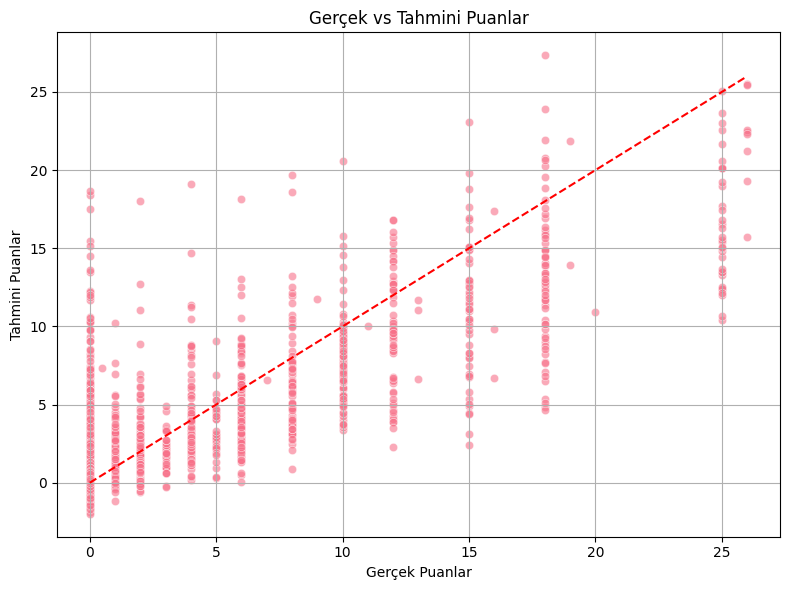


POZİSYON TAHMİNİ SINIFLANDIRMA MODEL DEĞERLENDİRMESİ
-------------------------------------------------------


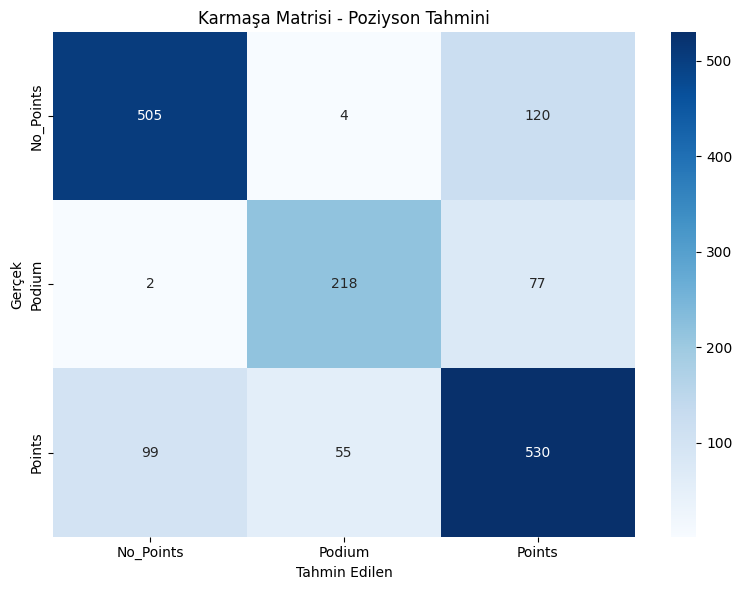


DRIVER PERFORMANCE HEATMAP BY YEAR
--------------------------------------------------


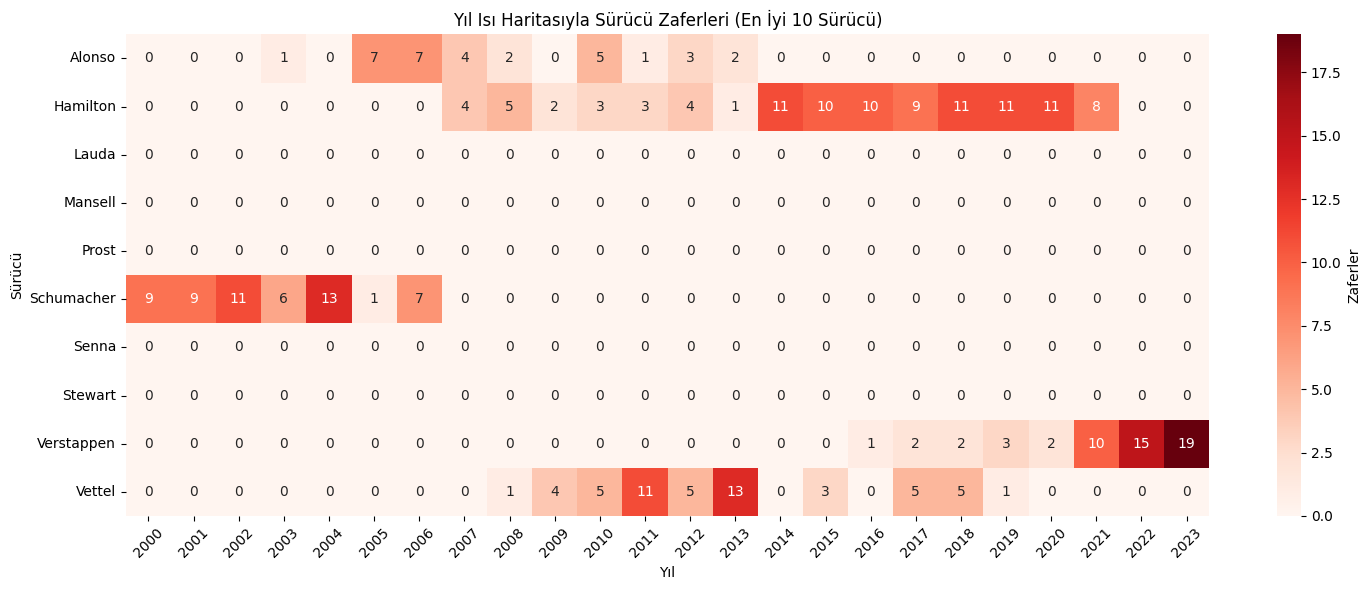


MODEL PERFORMANCE COMPARISON
--------------------------------------------------


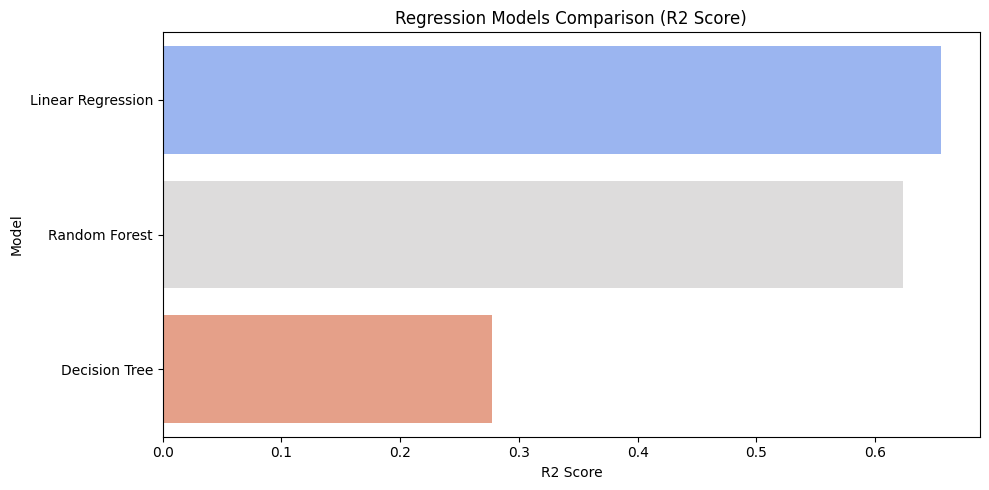

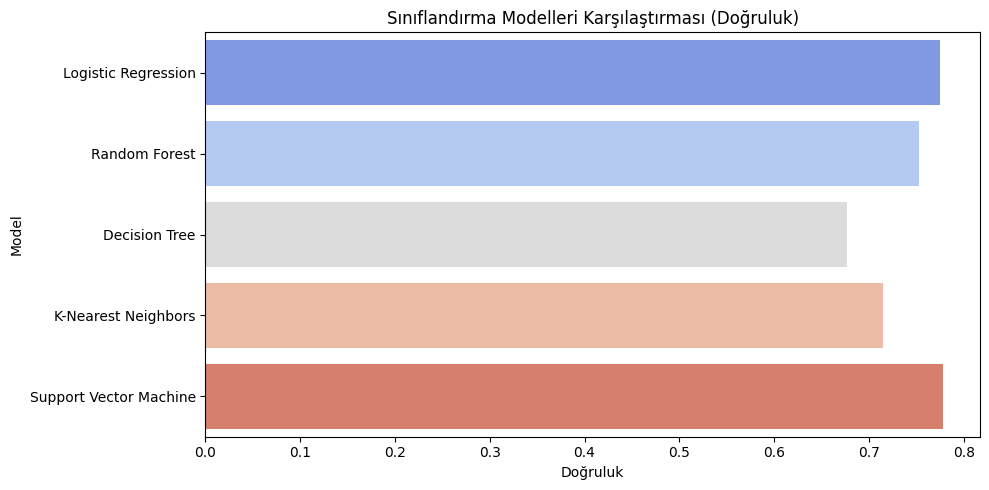

In [52]:
# Tüm çizimlerin gösterildiğinden emin olmak için matplotlib'i yapılandır
import matplotlib.pyplot as plt
plt.rcParams['figure.max_open_warning'] = 50  # Increase maximum number of figures
plt.close('all')  # Close any existing figures

# ------------------------------
# PUAN TAHMİNİ (Regresyon)
# ------------------------------
print("\nPUAN TAHMİNİ REGRESYON MODELİ DEĞERLENDİRMESİ")
print("-" * 50)

# En iyi regresyon modelini elde et
best_reg_model_name = max(regression_results.keys(), key=lambda x: regression_results[x]['r2'])
best_reg_model = regression_results[best_reg_model_name]['model']

# Tahmin yap
if best_reg_model_name == 'Linear Regression':
    y_pred_reg = best_reg_model.predict(X_test_reg_scaled)
else:
    y_pred_reg = best_reg_model.predict(X_test_reg)

# Değerlendirme figürü oluştur
plt.figure(1, figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Gerçek Puanlar")
plt.ylabel("Tahmini Puanlar")
plt.title("Gerçek vs Tahmini Puanlar")
plt.grid(True)
plt.tight_layout()
plt.show()

# Özellik önemi (ağaç tabanlı modeller için)
if hasattr(best_reg_model, 'feature_importances_'):
    importances = best_reg_model.feature_importances_
    feature_names = X_train_reg.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
    
    plt.figure(2, figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
    plt.title("🔍 Özelliğin Önemi - Puan Tahmini")
    plt.xlabel("Önem")
    plt.ylabel("Özellik")
    plt.tight_layout()
    plt.show()

# ------------------------------
# POZİSYON TAHMİNİ (Sınıflandırma)
# ------------------------------
print("\nPOZİSYON TAHMİNİ SINIFLANDIRMA MODEL DEĞERLENDİRMESİ")
print("-" * 55)

# En iyi sınıflandırma modelini elde et
best_clf_model_name = max(classification_results.keys(), key=lambda x: classification_results[x]['accuracy'])
best_clf_model = classification_results[best_clf_model_name]['model']

# Tahmin yap
if best_clf_model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
    y_pred_cls = best_clf_model.predict(X_test_clf_scaled)
else:
    y_pred_cls = best_clf_model.predict(X_test_clf)

# Karmaşıklık Matrisi
cm = confusion_matrix(y_test_clf_encoded, y_pred_cls)
class_names = le.classes_

plt.figure(3, figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Karmaşa Matrisi - Poziyson Tahmini")
plt.tight_layout()
plt.show()

# ------------------------------
# YILLARA GÖRE SÜRÜCÜ PERFORMANS ISI HARİTASI
# ------------------------------
print("\nDRIVER PERFORMANCE HEATMAP BY YEAR")
print("-" * 50)

# Sürücü performans verisini hazırlama
top_drivers = results[results['position'] == '1'].groupby('driverId').size().sort_values(ascending=False).head(10)

driver_year_data = []
for driver_id in top_drivers.index:
    driver_name = drivers[drivers['driverId'] == driver_id]['surname'].iloc[0]
    driver_results = results[(results['driverId'] == driver_id) & (results['position'] == '1')]
    driver_races = driver_results.merge(races[['raceId', 'year']], on='raceId')
    yearly_wins = driver_races.groupby('year').size()
    
    for year in range(2000, 2024):  # Limit to recent years for better visualization
        wins = yearly_wins.get(year, 0)
        driver_year_data.append({
            'Sürücü': driver_name,
            'Yıl': year,
            'Zaferler': wins
        })

driver_year_df = pd.DataFrame(driver_year_data)
driver_year_pivot = driver_year_df.pivot(index='Sürücü', columns='Yıl', values='Zaferler').fillna(0)

if not driver_year_pivot.empty:
    plt.figure(4, figsize=(15, 6))
    sns.heatmap(driver_year_pivot, cmap='Reds', annot=True, fmt='g', cbar_kws={'label': 'Zaferler'})
    plt.title('Yıl Isı Haritasıyla Sürücü Zaferleri (En İyi 10 Sürücü)')
    plt.xlabel('Yıl')
    plt.ylabel('Sürücü')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Isı haritası için uygun bir sürücü performansı yok.")

# ------------------------------
# MODEL PERFORMANS KARŞILAŞTIRILMASI
# ------------------------------
print("\nMODEL PERFORMANCE COMPARISON")
print("-" * 50)

# Regresyon modellerinin karşılaştırılması
reg_metrics = pd.DataFrame({
    'Model': regression_results.keys(),
    'R2 Score': [x['r2'] for x in regression_results.values()],
    'CV R2': [x['cv_r2'] for x in regression_results.values()]
})

plt.figure(5, figsize=(10, 5))
sns.barplot(x='R2 Score', y='Model', data=reg_metrics, palette='coolwarm')
plt.title('Regression Models Comparison (R2 Score)')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# Sınıflandırma modellerinin karşılaştırılması
clf_metrics = pd.DataFrame({
    'Model': classification_results.keys(),
    'Accuracy': [x['accuracy'] for x in classification_results.values()],
    'CV Accuracy': [x['cv_accuracy'] for x in classification_results.values()]
})

plt.figure(6, figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=clf_metrics, palette='coolwarm')
plt.title('Sınıflandırma Modelleri Karşılaştırması (Doğruluk)')
plt.xlabel('Doğruluk')
plt.ylabel('Model')
plt.tight_layout()
plt.show()